In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第18章 迴歸分析

變異數分析可以讓我們知道一個離散變數對一個連續型的因變數有沒有影響。但是，對於兩個連續型變數，一個連續型的變數對另一個連續型變數有沒有影響；有影響的話，這個影響具體有多大；當一個連續型變數變化時，另一個連續型變數會變多少等問題，直接使用變異數分析無法給我們提供參考答案。若要探討這個問題，則需進行迴歸分析（Regression Analysis）。迴歸分析能夠將多個連續型或是離散型的變數之間的關係量化，進而找到事物之間的線性相關關係或是進行預測。

## 18.1 一元線性迴歸模型

### 18.1.1 一元線性迴歸模型

假設有兩個變數：自變數（Independent Variable）$X$ 和因變數（Dependent Variable）$Y$，一元線性迴歸模型（Simple Linear Regression Model）是指用線性模型 $\alpha+\beta X$ 來刻畫 $Y$ 的變動，其中 $\alpha$ 和 $\beta$ 是未知的、待估計的參數。通常當變數有隨機的成分在時，就不能用一個變數完全解釋另一個變數，因此我們將 $Y$ 表達為：

$$Y_i=\alpha+\beta X_i+\varepsilon_i,\ i=1,2,\cdots,n,$$

其中
* $Y_i$ 為變數 $Y$ 的第 $i$ 個樣本，$X_i$ 為變數 $X$ 的第 $i$ 個樣本，共有 $n$ 個樣本，其中 $X_i$ 取值不能全部相等，也就是 $X$ 為非常數，假設所有 $X$ 的取值都相等，則可以推斷 $Y$ 的變化肯定不是由 $X$ 引起的，研究 $X$ 對 $Y$ 的影響毫無意義。

* $\varepsilon_i$ 為隨機誤差項（Error）或干擾項，表示 $Y_i$ 的變化中未被 $X_i$ 解釋的部分。

* 參數 $\alpha$ 和 $\beta$ 都被稱為迴歸係數（Regression Coefficient），其中 $\alpha$ 是截距項（Intercept）；$\beta$ 為斜率項（Slope），表示 $X$ 每增加一個單位，$Y$ 平均會增加 $\beta$ 的單位。

這裡要注意的是，線性迴歸模型中的「線性」是指模型是參數的線性函數，並不要求變數 $X$ 和 $Y$ 的線性函數，例如我們認為 $X$ 與 $Y$ 滿足

$$Y_i=\alpha+\beta\ln X_i+\varepsilon_i$$

該模型可以轉化為線性模型：

$$Y_i=\alpha+\beta Z_i+\varepsilon_i$$

其中 $Z_i=\ln X_i$ 可以透過對樣本 $X_i$ 取對數得到。因此只要是參數的線性模型，都適用於本章的分析。

### 18.1.2 最小平方法

在上述的線性模型中，$X_i$ 和 $Y_i$ 是樣本數據，但還需知道 $\alpha$ 與 $\beta$ 的值。對於 $\alpha$ 與 $\beta$ 的值，可以根據 $X_i$ 和 $Y_i$ 的數據來估計。估計的方法有很多種，例如前面講過的動差估計法就是一種。但是，很明顯的，採取不同的估計方法，就會得到不同的 $\alpha$ 與 $\beta$ 的估計值。而我們想要的自然是最接近真實值的估計。那麼，應該採取什麼方法進行估計呢？建構線性迴歸模型的目的是要來解釋 $Y$ 的變動，因此我們認為 $\alpha$ 與 $\beta$ 的估計式是令 $Y_i$ 中未被 $X_i$ 解釋的部分 $\varepsilon_i$ 越小越好。我們可以將誤差項 $\varepsilon_i$ 加總令其最小，但是，誤差 $\varepsilon_i$ 有時大於零有時小於零，加總時會正負抵消，這樣就無法區分沒有差異和正負差異相抵消時的情況。因此，我們選擇使用誤差 $\varepsilon_i$ 之平方和並令其最小，這種估計方法被稱為最小平方法（Least Squares Method）。求解 $\alpha$ 和 $\beta$ 的方式可以用數學是表達如下：

$$\min_{\alpha,\beta}Q\big(\alpha,\beta\big)=\frac{1}{n}\sum_{i=1}^n\big(Y_i-\alpha-\beta X_i\big)^2$$

根據函數最小化原則，能夠令誤差平方和 $Q\big(\alpha,\beta\big)$ 最小的 $\alpha、\beta$必須滿足以下一階條件（First Order Conditions）：

\begin{align}
\frac{\partial Q\big(\alpha,\beta\big)}{\partial\alpha}&=-2\frac{1}{n}\sum_{i=1}^{n}\big(Y_i-\alpha-\beta X_i\big)=0\nonumber\\
\frac{\partial Q\big(\alpha,\beta\big)}{\partial\beta}&=-2\frac{1}{n}\sum_{i=1}^{n}\big(Y_i-\alpha-\beta X_i\big)X_i=0\label{eq:18.1}\\
\end{align}

根據這兩條一階條件式，可以得到 $\alpha$ 與 $\beta$ 的最小平方估計式（Estimator）：

\begin{align}
\hat\beta&=\frac{\sum_{i=1}^{n}\big(X_i-\overline{X}\big)\big(Y-\overline{Y}\big)}{\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2}\nonumber\\
\hat\alpha&=\overline{Y}-\hat\beta\overline{X}\label{eq:18.2}\\
\end{align}

其中 $\overline{X}$ 和 $\overline{Y}$ 為 $X$ 和 $Y$ 的樣本均值，注意式 (\ref{eq:18.2}) 是估計式，也就是說，樣本觀測值不同，我們就會得到不同的 $\hat\alpha、\hat\beta$。如果我們將樣本觀測值 $x_1,x_2,...,x_n$ 和 $y_1,y_2,...,y_n$ 代入估計式 (\ref{eq:18.2}) 中，即可得到 $\hat\alpha$ 與 $\hat\beta$ 之最小平方估計值（Estimate）：

$$
\begin{split}
\hat\beta_n&=\frac{\sum_{i=1}^n\big(x_i-\overline{x}\big)\big(y_i-\overline{y}\big)}{\sum_{i=1}^{n}\big(x_i-\overline{x}\big)^2}\\
\hat\alpha_n&=\overline{y}-\hat\beta\overline{x}
\end{split}
$$

其中 $\overline{x}、\overline{y}$ 是 $\overline{X}、\overline{Y}$的實現值。

將 $\hat\alpha$ 與 $\hat\beta$ 之最小平方估計值代入線性模型，可得由樣本觀測值 $x_1,x_2,...,x_n$ 解釋的 $\hat{y}_i$：

$$\hat{y}_i=\hat\alpha_n+\hat\beta_nx_i,\ i=1,...,n$$

這個 $\hat{y}_i$ 被稱為擬和值（Fitted Value），而樣本觀測值 $y_i$ 與擬和值 $\hat{y}_i$ 之間的差值為殘差值（Residual Value）：

$$\hat\varepsilon_i=y_i-\hat{y}_i,\ i=1,...,n.$$

另外根據一階條件式(\ref{eq:18.1})，可得：

$$
\begin{split}
\sum_{i=1}^{n}\big(Y_i-\hat\alpha-\hat\beta X_i\big)&=\sum_{i=1}^{n}\hat\varepsilon_i=0\\
\sum_{i=1}^{n}\big(Y_i-\hat\alpha-\hat\beta X_i\big)X_i&=\sum_{i=1}^{n}\hat\varepsilon_iX_i=0
\end{split}
$$

## 18.2 模型擬合度

在現實中，可能不同的 $X$ 都可以用來解釋 $Y$ 之變動，例如自變數 $Y$ 是股票收益率，有人可能用公司每股收益解釋之，有人可能用公司市值解釋之。因此，我們需要一個指標能夠判斷出模型的好壞，對此，我們引入擬合度（Goodness of Fit）的概念。擬合度是指迴歸直線與樣本數據趨勢的吻合程度，取決於估計方法和樣本數據。

常用來判斷線性模型擬合度的指標是 $R^2$（R Square），又稱作可決係數（Coefficient of Determination），它刻畫的是自變數與因變數關係密切的程度，由迴歸模型解釋的變動量占 $Y$ 總變動量的百分比來刻畫。如果將因變數 $Y$ 的波動（變異）進行分解，可以得到如下式子：

$$\sum_{i=1}^{n}\big(Y_i-\overline{Y}\big)^2=\sum_{i=1}^{n}\big(\hat{Y}_i-\overline{Y}\big)^2+\sum_{i=1}^{n}\hat\varepsilon^2$$

其中
* 等號左邊為總平方和（Total Sum of Squares，TSS）：度量了因變數 $Y_i$ 的總波動情況；

* 等號右邊第一項為迴歸平方和（Regression Sum of Squares，RSS）：度量了模型估計出來的 $\hat{Y}_i$ 的波動情況，由於 $\hat{Y}_i$ 是根據自變數 $X_i$ 估計的，所以這一部分可以說是總平方和中可以被自變數 $X_i$ 解釋的波動；

* 等號右邊第二項為殘差平方和（Error Sum of Squares，ESS）：度量了殘差的波動，即不能被自變數 $X_i$ 解釋的波動。

由於 TSS、RSS、ESS 均為平方和，三者的關係為：

\begin{align}
\mathrm{TSS}=\mathrm{RSS}+\mathrm{ESS}\label{eq:18.3}
\end{align}

$R^2$ 的表達是為

$$R^2=\frac{\mathrm{RSS}}{\mathrm{TSS}}$$

根據式 (\ref{eq:18.3}) 可知 $R^2$ 在 0 到 1 之間取值，其值越大說明可用模型解釋的波動部分占總波動比例越高，亦即預測值（$\hat{y}_i$）越接近觀測值（$y_i$）。

## 18.3 古典假設條件下 $\hat\alpha、\hat\beta$ 之統計性質

最小平方法是利用誤差平方和最小得出參數 $\alpha$ 與 $\beta$ 的估計式，該估計式是樣本 $X_i$ 和 $Y_i$ 的函數，也就是說不同的樣本觀測值會有不同的參數估計值 $\hat\alpha、\hat\beta$。一般來說，隨機抽樣導致的波動和選擇的估計方法不同會使參數估計值與參數的真實值存在差距，因此 $Y_i$ 和 $X_i$ 需要滿足一些隨機條件，以衡量估計式之統計性質。以下為 $Y_i$ 和 $X_i$ 需要滿足的假設條件：

1. $X_i, i=1,2,...,n$ 為非隨機的變數。

2. 存在參數的真實值 $\alpha_0、\beta_0$ 使得 $Y_i=\alpha_0+\beta_0X_i+e_i, i=1,2,...,n$，其中干擾項 $e_i$ 滿足以下性質：

 1. $\text{E}(e_i)=0,\ i=1,2,...,n$，基於這個條件及 $X_i$ 非隨機的假設，可以得到 $\text{E}(Y_i)=\alpha_0+\beta_0X_i$。
 
 2. $\text{Var}(e_i)=\sigma_0^2,\ i=1,2,...,n$，這個條件又被稱為變異數同質性（Homoscedasticity）條件；當 $i\ne j$ 時，$\text{Cov}(e_i,e_j)=0$，這個條件式要求 $e_i$ 無自相關性。在最小平方法的框架下，干擾項 $e_i$ 之變異數 $\sigma_0^2$ 的估計式為：
 
 $$\hat\sigma^2=\frac{1}{n-2}\sum_{i=1}^{n}\hat\varepsilon_i^2$$
 
以上的假設條件被稱為迴歸的古典條件（Classical Conditions）。

接下來我們來分析最小平方估計式 $\hat\alpha、\hat\beta$ 和 $\hat\varepsilon^2$ 的統計性質。在古典假設條件下，可以證明最小平方估計式 $\hat\alpha、\hat\beta$ 是 $\alpha_0、\beta_0$ 的最佳線性無偏估計式（Best Linear Unbiased Estimator），其中「線性」是指 $\hat\alpha、\hat\beta$ 為所有 $Y_i$ 之線性組合；「無偏」是指 $\text{E}(\hat\alpha)=\alpha_0、\text{E}(\hat\beta)=\beta_0$；「最佳」是指任意其他線性無偏估計式 $\breve\alpha、\breve\beta$ 之變異數均大於 $\hat\alpha、\hat\beta$ 的變異數，也就是說對於所有的線性無偏估計式 $\hat\alpha、\hat\beta$，$\text{Var}(\breve\alpha)\ge\text{Var}(\hat\alpha)、\text{Var}(\breve\beta)\ge\text{Var}(\hat\beta)$。

此外，我們還可以得到估計式 $\hat\alpha、\hat\beta$ 的概率分佈。當滿足古典線性迴歸模型假設時，最小二乘估計量 $\hat\alpha、\hat\beta$ 服從常態分佈：

$$
\begin{split}
\hat\alpha &\sim N\left(\alpha_0,\sigma_0^2\left(\frac{1}{n}+\frac{\overline{x}^2}{\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2}\right)\right)\\
\hat\beta  &\sim N\left(\beta_0,\sigma_0^2\left(\frac{1}{\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2}\right)\right)
\end{split}
$$

另外，干擾項 $e_i$ 之變異數 $\sigma_0^2$ 的估計式 $\sigma_0^2=\frac{1}{n-2}\sum_{i=1}^{n}\hat\varepsilon_i^2$ 滿足以下分佈：

$$\frac{\big(n-2\big)\hat\sigma^2}{\sigma_0^2}\sim\chi^2\big(n-2\big)$$

從 $\hat\alpha、\hat\beta$ 的均值和變異數可以看出，$\hat\alpha、\hat\beta$ 具有以下性質：

1. 隨著樣本量 $n$ 的增加，估計式的精確度也會隨著增加。每增加一個觀測樣本點，模型的精確度將會提高。

2. $\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2$ 在 $\hat\alpha、\hat\beta$ 的變異數估計式中都有出現、且都在分母當中，說明 $\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2$ 越大，$\hat\alpha、\hat\beta$ 變異數越小，估計式的精確度增加。$\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2$ 表示 $X$ 變數樣本與樣本的離散程度。也就是說當樣本在 $X$ 取值上越離散，估計式的變異數越小；在 $X$ 取值上越集中時，變異數越大。

3. $\overline{X}^2$ 代表數據點相對於 $y$ 軸的平均偏離程度，當 $\overline{X}$ 離 $y$ 軸越遠，迴歸估計線的截距項 $\hat\alpha$ 越不容易確定，$\hat\alpha$ 的精確度就會隨之降低。

## 18.4 顯著性檢定

回想一下前面章節介紹的假設檢定，對於一個隨機變數，可以對其期望是否等於某個值進行檢定。在迴歸分析中，我們往往會對估計出的係數進行假設檢定。通常我們是對迴歸係數的真實值 $\alpha_0、\beta_0$ 提出虛無假設，然後計算統計量之取值，並根據 $\hat\alpha、\hat\beta$ 之分佈性質判斷根據樣本觀測點 $x_i,y_i$ 計算出來的 $\hat\alpha_n、\hat\beta_n$ 是否顯著異於虛無假設之取值，以此來判斷是否接收虛無假設。也正因為如此，我們把這樣的假設檢定叫做顯著性檢定，即變數之間的關係是否顯著。以係數 $\hat\beta$ 為例，顯著性檢定分為以下 4 個步驟：

1. 提出虛無假設 $H_0:\beta_0=b$；對立假設 $H_1:\beta_0\ne b$；

2. 確定顯著性水平 0.05、0.01 等（根據具體情況而定）；

3. 建構、計算統計量 $t_\beta$－－標準化的 $\hat\beta-b$：

$$
\begin{split}
t_\beta&=\frac{\big(\hat\beta-b\big)}{\left(\frac{\hat\sigma}{\sqrt{\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2}}\right)}\\
&=\frac{\sqrt{\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2}\left(\frac{\hat\beta-b}{\sigma_0}\right)}{\sqrt{\frac{(n-2)\hat\sigma^2}{\sigma_0^2}\times\big(n-2\big)}}
\end{split}
$$

式中 $\sqrt{\sum_{i=1}^{n}\big(X_i-\overline{X}\big)^2}\left(\dfrac{\hat\beta-b}{\sigma_0}\right)\sim N\big(0,1\big),\dfrac{\big(n-2\big)\hat\sigma^2}{\sigma_0^2}\sim\chi^2\big(n-2\big)$，由此可得 $t_\beta$ 服從 $t$ 分佈：

$$t_\beta\sim t\big(n-2\big)$$

4. 查自由度 $df=n-2$ 的 $t$ 分佈表得到臨界值或是計算出 $t_\beta$ 對應的 $p$ 值，作出是否拒絕或接受虛無假設的結論。例如，虛無假設中的 b 為 0 的情況下，如果接受 $\beta_0=0$ 的虛無假設，說明變數 $X$ 對於變數 $Y$ 的影響係數為 0，則此模型的構造沒有太大意義；若拒絕 $\beta_0=0$ 的虛無假設，說明變數 $X$ 對於變數 $Y$ 有顯著不為 0 的影響，則可根據 $X$ 的觀測值來預測隨機變數 $Y$。對於截距 $\hat\alpha$，我們可以採取同樣的方式進行檢定。

## 18.5 台灣加權指數與台灣 50 指數的迴歸分析與 Python 實踐

由前面的章節分析得知，台灣加權指數與台灣 50 指數的日度收益率數據存在著相關性關係。在本章節中，對兩個指數的日度收益率進行一元線性迴歸分析，進一步確定二者的相關關係。在分析之前，我們先來瞭解 Python 中的一些迴歸函數。

### 18.5.1 Python 估計迴歸模型

在 Python 中，估計線性模型主要透過 statsmodels 套件中的 OLS 類別完成。一般來說，我們需要先建構一個 OLS 類別，然後再呼叫該類別的 fit() 方法，進而得到線性迴歸的結果。

除了 fit() 函數，表 18.1 列舉了對估計線性模型非常有用的其他函數：

> 表 18.1: 擬合線性模型相關方法及屬性

函數        | 用途
:---        |:---
params()    |列出擬合模型的參數
conf_int()  |提供模型參數的信賴區間
fittedvalues|模型的擬合值
resid       |模型的殘差值
aic         |赤池訊息統計量
predict()   |用估計模型對新的數據集預測解釋變數

下面，我們使用 Python 對台灣加權指數與台灣 50 指數的收益率數據構造一元迴歸模型。

In [2]:
# 讀取數據
import pandas as pd
import numpy as np
TRD_Index=pd.read_table('.\\PythonBook_code_data\\part2\\index.csv',sep='\t')
TRD_Index.index = pd.to_datetime(TRD_Index.Date)
Taiex=TRD_Index[TRD_Index.CoName=='TSE Taiex    ']
tw50=TRD_Index[TRD_Index.CoName=='TW 50 INDEX  ']
retData = pd.concat([Taiex.ROI,tw50.ROI],axis=1).astype(np.float)
retData =retData.dropna()
retData.columns=['TAIEX','TW50']

# 構造台灣加權指數與台灣 50 指數收益率的迴歸模型
import statsmodels.api as sm
model=sm.OLS(retData.TAIEX,sm.add_constant(retData.TW50)).fit()
# 查詢迴歸模型結果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  TAIEX   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.206e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:27:47   Log-Likelihood:                 128.80
No. Observations:                 736   AIC:                            -253.6
Df Residuals:                     734   BIC:                            -244.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.008     -1.405      0.1

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


透過 summary() 這個函數，我們可以看出估計模型的詳細結果。

* $R^2$ 為 0.943，表明模型可以解釋台灣加權指數 $94.3\%$ 的變異量；

* 截距項是 $-0.0105$，$p$ 值為 $0.16>0.05$ 無法透過信心水準為 0.05 的假設檢定，可以推斷該模型不含截距項，即截距項為 0。

* 斜率的估計值為 0.8513，顯著不為 0（其 $p$ 值為 0.000，小於 0.05 的顯著性水平）。

根據以上結果，我們可以得到以下模型：

$$\mathit{TaiexRet}_i=-0.0105+0.8513*\mathit{TW50Ret}_i+\varepsilon_i$$

該模型表明台灣 50 指數日度收益率每增加 $1\%$，台灣加權指數日度收益率將增加約 0.76 個百分點。

此外，resid 屬性為迴歸的殘差值，fittedvalues 屬性為估計參數的擬合值。例如，查詢前 5 個擬合值，我們只需要輸入以下指令程式碼：

In [3]:
# 查詢前 5 個擬合值
model.fittedvalues[:5]

Date
2014-01-02   -0.311403
2014-01-03   -0.964040
2014-01-06   -0.478265
2014-01-07   -0.220735
2014-01-08    0.432924
dtype: float64

### 18.5.2 繪製迴歸診斷圖

我們可以透過呼叫 fit() 函數來擬合最小二乘迴歸模型，並透過迴歸結果的各種屬性和方法來獲取模型參數、相關統計量和模型的其他訊息。不過根據前面線性迴歸模型基礎知識的介紹，線性模型中參數估計值的顯著性檢定是建立在對誤差項的一系列假設上，對模型參數推斷的信心依賴於樣本數據 $y_i、x_i$ 是否滿足這些假設條件。雖然 summery() 函數提供了對模型的整體描述，但是 summary() 的結果不能表明數據是否滿足這些假設條件。若數據無法滿足假設條件或者錯誤設定自變數與因變數的關係，都會使模型產生巨大的偏差，若在實際中採用存在偏差的模型，可能產生帶來預測誤差。因此，我們需要對迴歸模型進行一些檢定。一般來說，我們可以繪製以下幾種圖來幫助我們進行檢定。

* 線性（圖 18.1）：若因變數與自變數線性相關，殘差值應該和擬合值每有任何的系統關聯，呈現出圍繞著 0 隨機分佈的狀態。從第一幅圖來看，這一假定基本上滿足。


Text(0.5, 0, '擬合值')

Text(0, 0.5, '殘差')

Text(0.5, -0.27, '圖 18.1：台灣加權指數與台灣 50 指數日度收益率迴歸診斷圖 1')

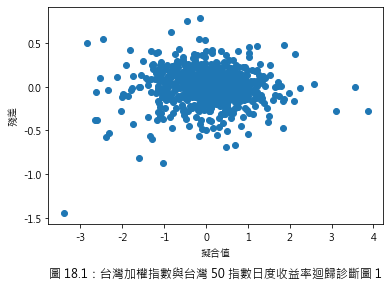

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('擬合值')
plt.ylabel('殘差')
#plt.text(-3,-2.2 , "圖 18.1：台灣加權指數與台灣 50 指數日度收益率迴歸診斷圖 1")
plt.title('圖 18.1：台灣加權指數與台灣 50 指數日度收益率迴歸診斷圖 1', y=-0.27)

常態性（圖 18.2）：當因變數成常態分佈時，那麼模型的殘差項應該是一個均值為 0 的常態分佈。常態 Q-Q 圖（Normal quantile-quantile）是在常態分佈對應的值下，標準化殘差的概率圖，若滿足常態性假設，那麼圖上的點應該落在一條直線上，若不是，則違背了常態性的假設。

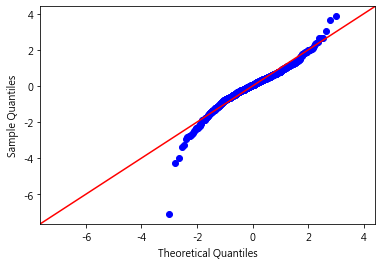

Text(0.5, -0.3, '圖 18.2：台灣加權指數與台灣 50 指數日度收益率迴歸診斷圖 2')

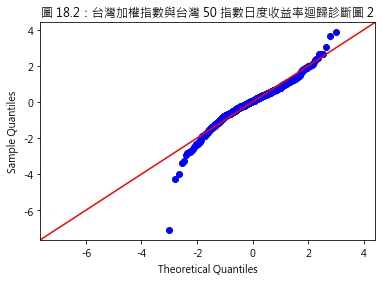

In [5]:
import scipy.stats as stats
sm.qqplot(model.resid_pearson,stats.norm,line='45')
plt.title('圖 18.2：台灣加權指數與台灣 50 指數日度收益率迴歸診斷圖 2', y=-0.3)

從圖 18.2 來看，圖上的大部分的點在直線上或者位於直線附近，大致可以推論數據滿足常態性的假設[<sup> 4</sup>](#fn4)。

變異數同質性（圖 18.3）：若滿足變異數均相等的假定，那麼在位置尺度圖上（Scale-Location Plot），各點分佈應該呈現出一條水平的、寬度一致的條帶形狀。從圖中可以看出，我們的模型基本不滿足變異數同質性假設。

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '擬合值')

Text(0.5, 0, '標準化殘差的平方根')

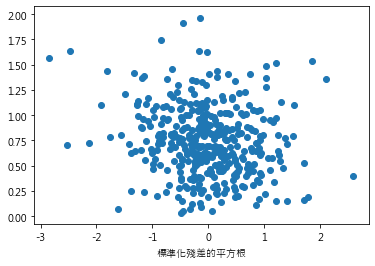

In [6]:
plt.scatter(model.fittedvalues,model.resid_pearson**0.5)
plt.xlabel('擬合值')
plt.xlabel('標準化殘差的平方根')
#plt.title('圖 18.3：台灣加權指數與台灣 50 指數日度收益率迴歸診斷圖 3', y=-0.3)

<span id="fn4"><sup>4</sup> 實際上，在金融市場上，很多收益率的分佈都與常態分佈有一定的偏差。這種偏差是一種很典型的金融異象－－尖峰厚尾。</span>

## 18.6 多元線性迴歸模型

一元線性迴歸模型可以研究某一自變數與某一因變數之間關係，但是現實世界中變數的關係錯綜複雜，某一現象往往由許多的因素共同影響。在這種情形下，單一自變數的解釋能力有其侷限性。職是之故，我們在一元線性迴歸模型的基礎上拓展，使用多個自變數來解釋因變數，此即多元線性迴歸模型（Multiple Linear Regression Model）。

### 18.6.1 多元線性迴歸模型

與一元線性迴歸模型類似，多元線性迴歸模型的形式為：

$$Y_i=\beta_0+\beta_1X_{1,i}+\cdots+\beta_kX_{k,i}+\varepsilon_i,\quad i=1,2,3,...,n$$

其中，$X_{k,i}$ 為第 $k$ 個自變數 $X_{k}$ 的第 $i$ 個樣本。

在一元線性迴歸模型中，我們採用最小平方法來估計參數的值，在多元線性迴歸模型中，同樣採用最小平方法進行參數的估計。但是，為了使估計出來的參數同樣具有一元線性迴歸模型參數估計量的性質，多元線性迴歸模型不僅要滿足一元線性迴歸模型的假設，還要保證模型中的自變數不存在共線性。共線性是指一個自變數可以由其他自變數線性表示，即 $X_i=\sum_{j=1}^ka_jX_j$。要注意的是，即使不是完全的共線性，變數之間的強相關性仍會使得模型結果產生偏差。

在多元線性迴歸模型中，同樣用可決係數 $R^2$ 來表達模型之擬合度。不過對多元線性迴歸模型來說，隨著自變數數目的增加，對因變數的解釋能力也相應增加，故模型的擬合度相應增加。但是，這似乎也給我們構造模型帶來一些困擾，例如在研究股市的影響因素時，當考慮世界上所有可能的解釋變數，甚至包括天氣、季節等因素，這樣擬合出來的模型的可決係數 $R^2$ 會很高。但是模型的可決係數 $R^2$ 很高不一定說明模型是一個好的模型，用一切解釋變數來解釋因變數時，就猶如沒有解釋一樣，即使建立模型，也無法抓住重點因素，進而很難實現分析和研究。

因此，我們需要找一個比可決係數 $R^2$ 更好的指標來反應多元線性迴歸模型的擬合優度。這個指標與 $R^2$ 相比，要滿足：不是解釋變數數目的單調遞增函數。也就是說，這個指標所反映出來的訊息應該是：我們建構的模型確實不錯，而不是因為解釋變數的數目多而看上去很好。因此，這裡引入了調整後的可決係數 $R_c^2$，其表達式為：

$$R_c^2=1-\frac{n-1}{n-k-1}\big(1-R^2\big)$$

其中 $n$ 為樣本觀測量，$k$ 為自變數個數，當可決係數 $R^2$ 相同時，自變數個數越多，調整後的可決係數 $R_c^2$ 就越小。因此構造模型時，需要在模型擬合度和自變數個數中作出權衡取捨。此外，調整的可決係數 $R_c^2$ 還能用於評價不同個數自變數的迴歸模型的擬合效果。

多元迴歸模型的參數顯著性檢定與一元迴歸模型的思想和做法類似，在這裡就不再贅述。不過多元迴歸模型中涉及到多個參數，因此可以對幾個參數一起做聯合檢定，例如我們想看模型中所有的係數是否都為 0，或者，前兩個自變數的係數相加是否為 1 之類的關係。這時要建立新的統計量，不過進行這些檢定的前提假設條件依舊是古典假設，而建構統計量的思想一就是標準化，讀者可以參考前面的內容進行建構。

## 18.7 多元線性迴歸案例分析

__價格水平對 GDP 的影響__
下面我們經由探究價格水平對 GDP 的影響來說明如何透過 Python 實作多元迴歸分析。文件 Penn World Tabel.xlsx 中包含了我們所用的數據，該數據來自 Penn World Tabel，記錄了世界各國 2007 年到 2011 年的 GDP、人口、價格水平等宏觀數據。我們所使用的具體變數為：

+ rgdep: 實質 GDP（Expenditure-side read GDP）

+ pl_c: 居民消費價格水準（Price level of household consumption）

+ pl_i: 資本形成品價格水準（Price level of capital formation）

+ pl_g: 政府採購價格水準（Price level of government consumption）

+ pl_x: 出口品的價格水準（Price level of exports）

+ pl_m: 進口品的價格水準（Price level of imports）

+ pl_k: 資本存量的價格水準（Price level of the capital stock）

從經濟上來說，價格水準和總體經濟水平有著密不可分的關係。而 GDP 作為衡量總體經濟的一個重要指標，自然也和各種價格水平有著密不可分的關係。那麼，自然就有了一個問題：這些不同類型的價格水準對 GDP 到底有著怎樣的影響？現在，我們就嘗試透過多元迴歸分析來解決這個問題。

In [7]:
# 載入數據
penn=pd.read_excel('.\\PythonBook_code_data\\part2\\Penn World Table.xlsx',2)
# 我們只需要關注數據的後面幾個變數即可
penn.head(3)

# 假設我們先放入一個混合模型，即對變數不做過多的篩選
# 將 pl_i、pl_g、pl_m 等五個變數都放到迴歸模型內。
# 我們對 GDP 進行了對數變化，使其更符合常態分佈
model=sm.OLS(np.log(penn.rgdpe),sm.add_constant(penn.iloc[:,-6:])).fit()
print(model.summary())

,countrycode,country,currency_unit,year,rgdpe,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,AGO,Angola,Kwanza,2007,58131.746094,1.253990,0.738191,1.076301,0.650072,0.764166,0.617699
1,AGO,Angola,Kwanza,2008,67472.859375,1.418632,0.938361,1.352946,0.774891,0.937404,0.777646
2,AGO,Angola,Kwanza,2009,59256.636719,1.681747,0.786687,1.105007,0.829843,1.190549,0.657191


                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     56.69
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           9.81e-59
Time:                        22:27:48   Log-Likelihood:                -1670.2
No. Observations:                 835   AIC:                             3354.
Df Residuals:                     828   BIC:                             3388.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4226      0.518     16.254      0.0

根據迴歸結果，可以發現 pl_c 與 pl_k 是不顯著的。這與我們的常識有點不一樣，因為居民消費價格水準是我們最常見的一種價格水準，也經常被認為是 GDP 的一個重要影響因素。同樣地，pl_k 則是資本存量的價格水準，與 GDP 的重要組成部分－－投資密切相關。因此，按照預期，pl_k 和 GDP 應當有著一定的關係。此外，pl_i 與 pl_x 與 GDP 是顯著負相關的，pl_g 和 pl_m 則是對 GDP 有顯著的正面影響，pl_g 的正向係數可能與我們的直覺經驗相反，因為一般來說，政府採購價格的升高會導致政府採購的降低，進而減少 GDP。

__考量自變數共線性因素的新模型__
由於這幾個變數之間也存在著一定的關係，例如 pl_i 和 pl_k 的含意就差不多，因此這六個變數可能存在著共線性。現在，我們透過查詢各變數的相關性來檢定可能存在的共線性。

In [8]:
penn.iloc[:,-6:].corr()

,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
pl_c,1.000000,0.718931,0.636698,0.078841,0.213328,0.553757
pl_i,0.718931,1.000000,0.259183,0.072019,0.139333,0.779306
pl_g,0.636698,0.259183,1.000000,0.130729,0.256069,0.211259
pl_x,0.078841,0.072019,0.130729,1.000000,0.477304,-0.065623
pl_m,0.213328,0.139333,0.256069,0.477304,1.000000,0.000531
pl_k,0.553757,0.779306,0.211259,-0.065623,0.000531,1.000000


可以看到， pl_c 和多個變數之間存在著較強的相關性，而 pl_k 和 pl_i 的相關係數則達到了 0.779306。這一點違背了多元迴歸的第五個假設：自變數之間無共線性。自變數共線性會導致我們的結果不能反映真實情況。這也是在我們的第一個模型中 pl_c 與 pl_k 的係數不顯著的原因。所以，下面我們剔除了 pl_c 與 pl_k 這兩個變數，重新修改模型（模型 2）。

In [9]:
# 模型 2
# 剔除 pl_c 與 pl_k 的迴歸模型
model=sm.OLS(np.log(penn.rgdpe),\
            sm.add_constant(penn.iloc[:,-5:-1])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     84.00
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           6.58e-60
Time:                        22:27:49   Log-Likelihood:                -1672.0
No. Observations:                 835   AIC:                             3354.
Df Residuals:                     830   BIC:                             3378.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3558      0.502     16.631      0.0

第二個模型中各個變數的係數和第一個模型中這些變數的係數相差並不是很大，符號也都未變。

最終，我們得到的模型為：

$$\log{(\mathit{rgdpe}_i)}=8.3553-1.1296\mathit{pl\_i}_i+1.5452\mathit{pl\_g}_i+6.0596\mathit{pl\_m}_i-3.0228\mathit{pl\_x}_i+\varepsilon_i$$